In [1]:
import sys
sys.path.append('../')

import numpy as np
from scipy import ndimage

from skimage.filters import sobel_h
from skimage.filters import sobel_v
from scipy import stats


import os
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


import scienceplots
from tensorflow.python.client import device_lib

#plt.rcParams['figure.figsize'] = [10,10]

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications import VGG16

from tensorflow.nn import depthwise_conv2d
from tensorflow.math import multiply, reduce_sum, reduce_mean,reduce_euclidean_norm, sin, cos, abs
from tensorflow import stack, concat, expand_dims

import tensorflow_probability as tfp

from utils.utils import *
import cv2

from scipy import ndimage, fft
from io import BytesIO

plt.style.use(['science', 'ieee'])
plt.rcParams.update({'figure.dpi': '100'})

/tmp/ipykernel_8698/675125867.py:5: UserWarning: A NumPy version >=1.23.5 and <2.5.0 is required for this version of SciPy (detected version 1.23.0)
  from scipy import ndimage
2025-10-20 10:43:56.554009: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-20 10:43:56.577235: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-20 10:43:56.577254: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-20 10:43:56.577959: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to regis

In [2]:
k = 3   # kernel size
beta2s = [1, 0.25, 0.5, 0.75] #[0, 0.25, 0.75, 1]  
activations = [tf.nn.relu]
timestamps = [1,25, 100]
experiment_name = "bipolar_circle"
box_dims = [200, 100]
step =   25 # Plot axis step

In [3]:
tf.nn.relu.__name__

'relu'

In [4]:
3//2

1

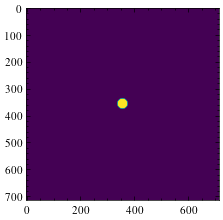

In [5]:
# Single pixel input
d = 715
mid = d//2

img = np.zeros((d,d)) # cv2.imread('input4.png', 0)/255. 


cv2.circle(img,(mid,mid), 19, (255.0), -1)
mid = img.shape[0]//2

plt.imshow(img)

In [6]:
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
filters = np.zeros((3,3,1,1))
img = tf.cast(tf.repeat(tf.expand_dims([img], axis=-1) , repeats = filters.shape[-2], axis=-1), dtype=tf.float32)

2025-10-20 10:43:57.987408: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-10-20 10:43:58.024992: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-10-20 10:43:58.026478: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

2025-10-20 10:43:58.288729: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2025-10-20 10:43:58.334942: E external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

2025-10-20 10:43:58.336384: W external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:225] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 12.0
2025-10-20 10:43:58.336395: W external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:228] Used ptxas at ptxas
2025-10-20 10:43:58.336434: W external/local_xla/xla/stream_executor/gpu/redzone_allocator.cc:322] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


50 -50
39 39
tf.Tensor(0.9999999999999999, shape=(), dtype=float64)
4.0 0.0


2025-10-20 10:43:58.456750: E external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

2025-10-20 10:43:58.458184: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2025-10-20 10:43:58.525604: E external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

2025-10-20 10:43:58.526535: E external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or inval

26.090633
0.9999988
120.93401
147.87537
163.47601
173.43854
180.81863
186.25009
190.45403
193.74097
196.21417
198.02115
199.23805
200.00754
200.38054
200.43701
200.1969
199.71106
199.02858
198.18846
197.22308
197.57288
198.70238
199.6892
200.54236
201.26677
1.0000007
201.88013
202.39525
202.82388
203.1741
203.45502
203.67249
203.83006
203.9319
203.9852
203.9953
203.96722
203.90503
203.81203
203.68977
203.54019
203.36629
203.17068
202.95628
202.72516
202.47893
202.21834
201.9438
201.65765
201.36113
201.05554
200.74207
200.42154
200.0947
199.7616
199.42308
199.08
198.73283
198.38269
198.02982
197.67441
197.31654
196.95656
196.59537
196.23312
195.8702
195.50694
195.14319
194.77933
194.41553
194.05194
193.68884
193.32625
192.96469
192.60397
192.24413
191.88527
191.52742
191.1711
190.8162
190.4628
190.1109
189.76025
189.4114
189.06422
188.71873
188.37506
188.0332
187.69292
187.35461
187.01816
186.6836
186.35095
186.02003
185.69125
185.36443
185.0395
184.7165
184.39548
184.0762
183.75912
0.9

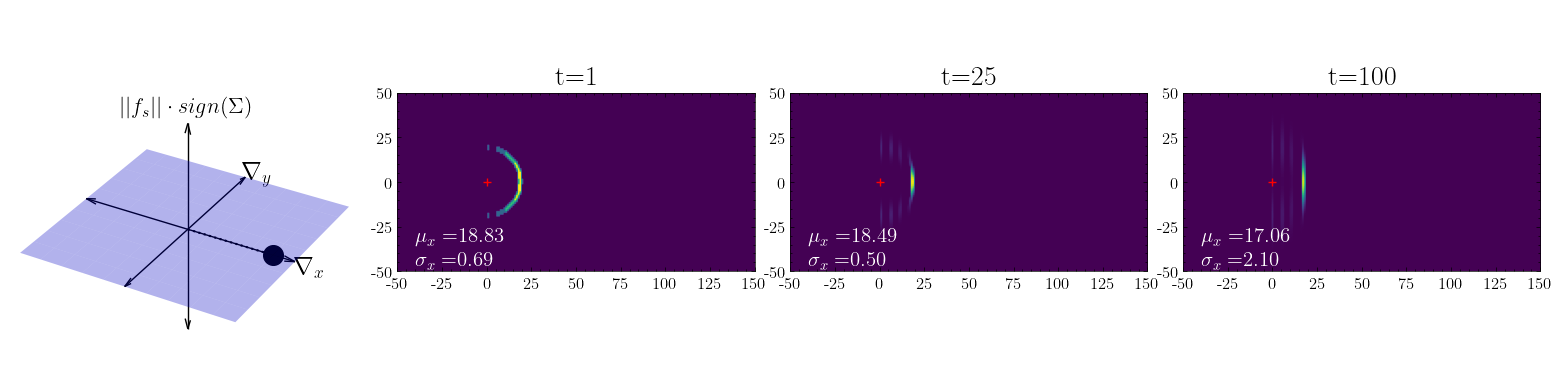

tf.Tensor(1.0, shape=(), dtype=float64)
2.0 3.4641016151377544
55.346584
0.9999996
56.60369
57.170902
57.60755
57.98133
58.31583
58.62274
58.90883
59.178524
59.434925
59.6802
59.91608
60.143734
60.364323
60.5786
60.787273
60.990837
61.18996
61.384884
61.576008
61.76366
61.94809
62.12961
62.308285
62.484417
1.0000004
62.658054
62.829414
62.998547
63.165604
63.33063
63.4937
63.654945
63.81414
63.971745
64.127304
64.28137
64.43319
64.583755
64.73194
64.87901
65.0234
65.16696
65.307465
65.44736
65.58385
65.72017
65.8525
65.985146
66.11316
66.24203
66.36562
66.49067
66.60967
66.730865
66.845184
66.962456
67.07199
67.18532
67.289986
67.39937
67.49908
67.60449
67.69929
67.80074
67.89046
67.987976
68.07263
68.16625
68.245865
68.335625
68.4102
68.49614
68.56579
68.64796
68.71257
68.791046
68.850746
68.9256
68.98044
69.05172
69.10185
69.16966
69.21502
69.27943
69.320175
69.38126
69.4175
69.47541
69.50722
69.56192
69.589424
69.64107
69.66433
69.71301
69.73225
69.77804
69.79321
69.83621
69.847496


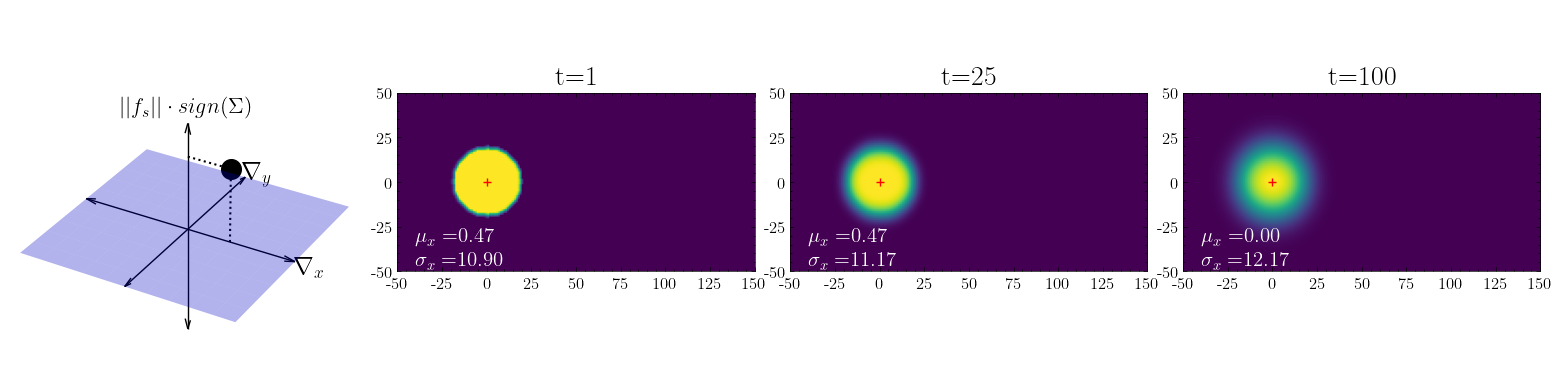

tf.Tensor(1.0, shape=(), dtype=float64)
2.8284271247461903 2.8284271247461903
48.57573
1.0000005
48.52441
48.493477
48.55501
48.84569
48.503822
49.406124
49.108574
49.815826
49.591427
50.08243
49.93484
50.197006
50.139805
50.19859
50.235363
50.154953
50.243942
50.393963
50.183006
50.618412
50.421177
50.780693
50.608967
50.887978
1.0000004
50.746605
50.94711
50.839252
50.964394
50.892
50.94549
50.909542
50.895416
50.896286
50.849873
50.855995
50.93731
50.804436
51.00068
50.87859
51.042183
50.932465
51.06363
50.9678
51.067017
50.985996
51.053944
50.98868
51.026123
51.019413
51.081085
51.141712
51.201294
51.259933
51.317432
51.37399
51.429413
51.483833
51.53718
51.589607
51.640892
51.691284
51.74051
51.78887
51.836067
51.88242
51.927532
51.9719
52.015106
52.057518
52.09878
52.13927
52.178616
52.217224
52.25468
52.291435
52.32704
52.361973
52.395786
52.428947
52.460995
52.49243
52.522747
52.552505
52.58114
52.609238
52.63616
52.662663
52.68807
52.713005
52.736855
52.760296
52.782642
52.804

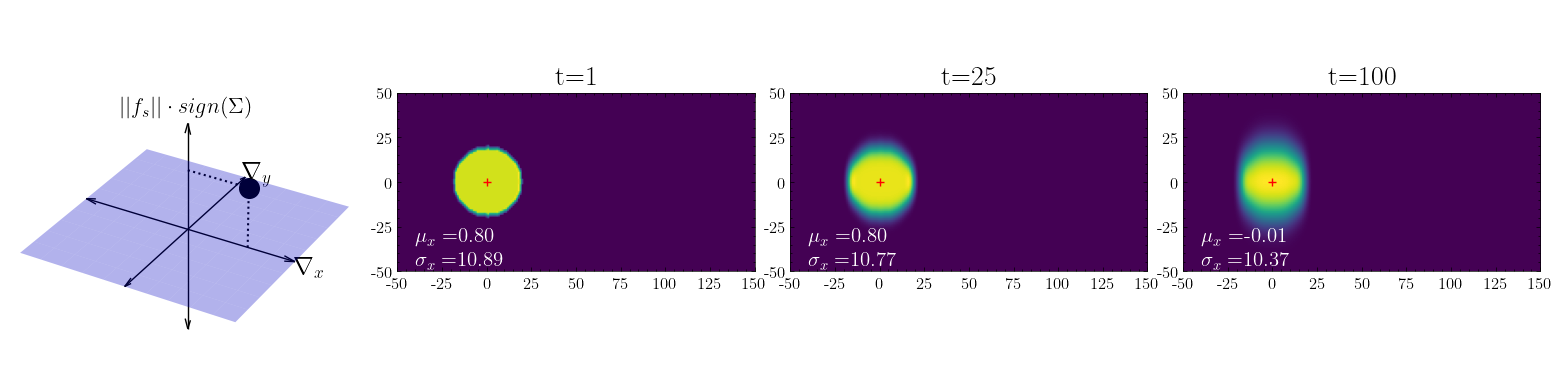

tf.Tensor(1.0, shape=(), dtype=float64)
3.4641016151377544 2.0
43.89806
0.99999934
44.49365
57.966267
60.14144
76.141594
82.70059
102.57441
113.68055
137.8099
142.93083
169.1543
166.57497
191.7714
181.89424
205.12708
190.0428
211.88147
193.58583
215.05397
194.87967
216.45993
194.9208
216.79665
194.14627
216.45625
1.0000004
192.8253
215.661
191.08807
214.5241
189.00789
213.12347
187.12813
211.52159
189.2823
209.76146
191.6119
207.87056
193.88858
206.00098
195.29637
204.4615
196.0224
203.18657
196.41888
202.03217
196.60783
200.9912
196.59006
200.0456
196.38261
199.14082
196.045
198.25116
195.62029
197.36626
195.13756
196.48524
194.58986
195.62453
193.98756
194.78067
193.34631
193.94763
192.67967
193.12328
191.99773
192.30646
191.30835
191.50049
190.61143
190.70671
189.90503
189.92297
189.19101
189.14677
188.47234
188.37672
187.75201
187.61333
187.03282
186.85712
186.31525
186.10893
185.59866
185.36792
184.88312
184.63255
184.1689
183.9027
183.45775
183.17886
182.75037
182.46072
182.04675

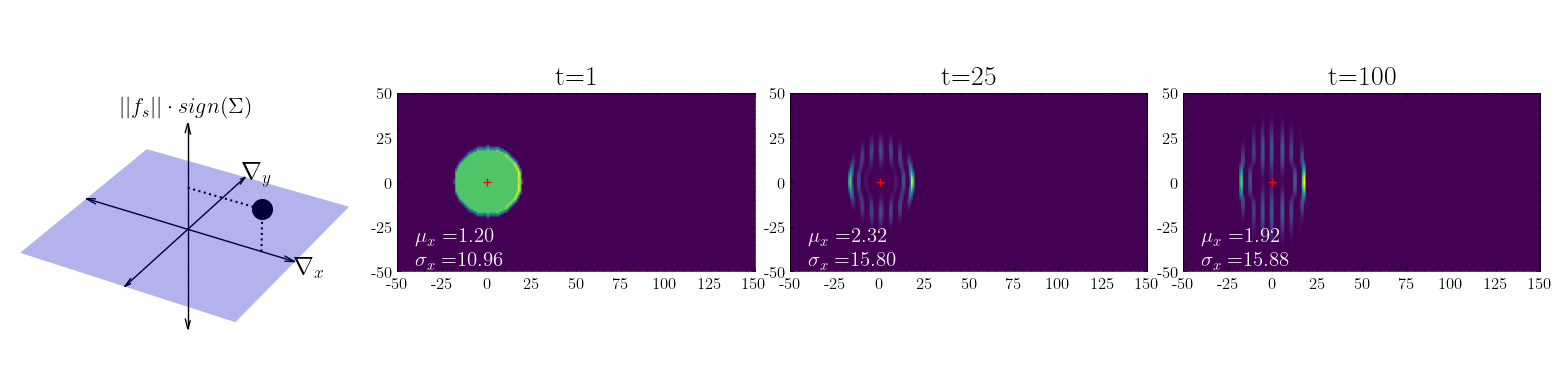

In [8]:
import matplotlib.patches as mpatches



filters = np.zeros((3,3,1,1))



#Get image height and width

vals_x = img[0, img.shape[1]//2, :, :]
vals_y = img[0, :, img.shape[2]//2, :]
nonzeros = np.nonzero(vals_x)[0]
if nonzeros.size > 0:
    length_y = nonzeros[-1] - nonzeros[0] + 1
else:
    length_y = 0  # all zeros
nonzeros = np.nonzero(vals_x)[0]
if nonzeros.size > 0:
    length_x = nonzeros[-1] - nonzeros[0] + 1
else:
    length_x = 0  # all zeros



#step = 2**np.floor(np.log2(( (length_x) + np.max(timestamps) )// 5))


max_x = int(box_dims[0]*(.75))
min_x = -int(box_dims[0]*(.25))

max_y = box_dims[1]//2
min_y = -(box_dims[1]//2)

print(max_y, min_y)
print(length_x, length_y)


for activation in activations:
	for beta2 in beta2s:

		
		images = []

		filters = np.zeros((3,3,1,1))

		t = np.zeros((3,3))
		t[1, 0] = np.sqrt(beta2)
		t[0, 0] = np.sqrt(1-beta2)
		filters = np.reshape(fft.idctn(t, norm='ortho'), (3,3,1,1)) 
		print(tf.math.reduce_euclidean_norm(filters))
		#filters /= tf.math.reduce_euclidean_norm(filters)
		
		w =tf.cast(filters, dtype=tf.float32)# tf.expand_dims(filters, -1), dtype=tf.float32)
		w = tf.transpose(w, perm=(1,0,2,3))


		x = img


		directory = f"figures/{experiment_name}_{activation.__name__}_{k}x{k}_{beta2}"
		if not os.path.exists(directory):
			os.makedirs(directory)




		#Generate Plot
		fig = plt.figure(figsize=(16,len(timestamps)+1))
		gs = fig.add_gridspec(1,len(timestamps)+1, wspace=0.1)

		ax0 = fig.add_subplot(gs[0], projection='3d')
		plot_filter_x(beta2, ax = ax0)
		ax0.axis('off')

		#for i, im in enumerate(images):	
		plot_num = 1
		for i in range(timestamps[-1]+1):
			x = x/np.std(x)
			
			if i in timestamps:

				ax = fig.add_subplot(gs[plot_num])
				plot_num+=1
				print(np.std(x))
				vals = x[0, x.shape[1]//2, :, :]
				vals = vals/np.sum(vals)

				pos = np.expand_dims(np.linspace(-(x.shape[1]//2), x.shape[1]//2, x.shape[1]),-1)
				mean = tf.reduce_sum(pos*vals)
				var = tf.reduce_sum(((pos-mean)**2) * vals)
				std = np.sqrt(var)
				#print(mean, np.sqrt(var))
				
				im = ax.imshow(x[0,:,:,0])
				ax.plot(mid, mid, marker = '+', color='red')

				'''arr =  mpatches.FancyArrowPatch((mid, mid), (mid+mean+std, mid),
										mutation_scale=4, shrinkA=0, shrinkB=0,zorder=10, color="red")
				ax.add_patch(arr)'''


				ax.annotate(r'$\sigma_x=$'+f"{std:.2f}", (0.05,0.01), ha='left', va='bottom',color='white', xycoords='axes fraction', fontsize=15)
				ax.annotate(r'$\mu_x=$'+f"{mean:.2f}", (0.05,0.14), ha='left', va='bottom',color='white', xycoords='axes fraction', fontsize=15)
				#ax.annotate(r'$argmax_x=$'+f"{np.argmax(vals)-mid:.2f}", (0.05,.17), ha='left', va='bottom',color='white', xycoords='axes fraction')
				
				#ax.annotate(r'$\sigma=$'+f"{std:.2f}", (.5, 6), xycoords=arr, ha='center', va='bottom',color='white')
				#ax.arrow(, 112, dx=, dy= 0, color='black')




				ax.set(xlim=((mid + min_x, mid+max_x)) , ylim=((mid+min_y, (mid+max_y))))

				# Re-label ticks relative to midpoint
				xticks = ax.get_xticks()
				yticks = ax.get_yticks()

				#ax.set_xticklabels(np.arange(min_x, max_x+1, step=2))
				#ax.set_yticklabels(np.arange(min_y, max_y+1, step=2))
				xticks = np.arange(np.sign(min_x) * (np.abs(min_x)//2)*2, step+(max_x//2)*2, step=step) + mid
				yticks = np.arange(np.sign(min_y) * (np.abs(min_y)//2)*2, step+(max_y//2)*2, step=step) + mid
				ax.set_xticks(xticks)
				ax.set_yticks(yticks)
				ax.tick_params(axis='x', labelsize=12)
				ax.tick_params(axis='y', labelsize=12)


				ax.set_xticklabels([x - mid for x in xticks])
				ax.set_yticklabels([y - mid for y in yticks])



				#ax.set_xticks(np.linspace(-round(std)-1, round(std)+1, int(0.5*(std)+3)))
				#fig.colorbar(im, orientation='vertical')

				'''plt.close(fig) 
				buf = BytesIO()
				fig.savefig(buf, format="svg", dpi=fig.dpi, bbox_inches="tight")
				buf.seek(0)'''



				#ax0.imshow(im)
				#ax.axis('off')
				ax.set_title(f"t={i}", fontsize=20)


				#images.append(Image.open(buf))
				#print(x)

			x = activation( tf.nn.conv2d(x, w , strides=(1,1), 
									padding='SAME') )
			
			w = np.rot90(w, k=2, axes=(0,1))


			print(np.max(x))


		fig.subplots_adjust(left=0.02, right=0.98, top=0.9, bottom=0.01, wspace=0.1)
		fig.savefig(f"{experiment_name}_{k}x{k}__{activation.__name__}_{beta2}.pdf", format="pdf", dpi=fig.dpi, bbox_inches="tight")
		plt.show()


In [9]:
xticks-mid

array([-50, -25,   0,  25,  50,  75, 100, 125, 150])

In [10]:
mid

357

In [11]:
yticks#-mid

array([307, 332, 357, 382, 407])

In [12]:
step

25